<center><h1>Hough Tranform, Harris Corner Detection and Object Segmentation</h1></center>

In [61]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Hough Transform</h2>

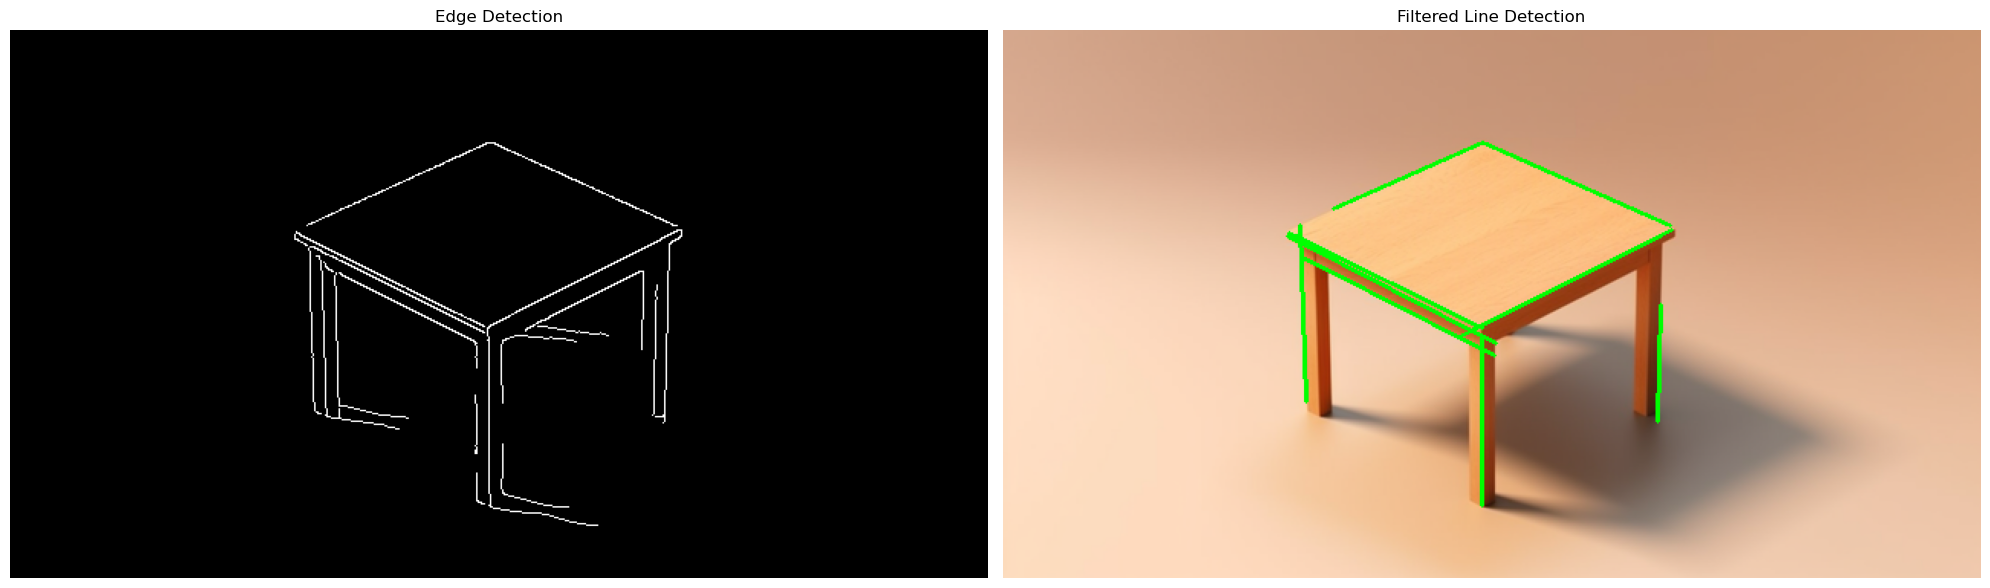

In [ ]:
og = cv2.imread(r"table.png") #Replace with your image path
gray = cv2.cvtColor(og, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5,5), 0)

edges = cv2.Canny(blurred, 50, 100)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=90,minLineLength=30,maxLineGap=20)  

output = og.copy()

if lines is not None:
    for line in lines:
        x1,y1,x2,y2 = line[0]
        cv2.line(output, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Filtered Line Detection")
plt.axis("off")

plt.tight_layout()
plt.show()

<h2>Harris Corner Detection</h2>

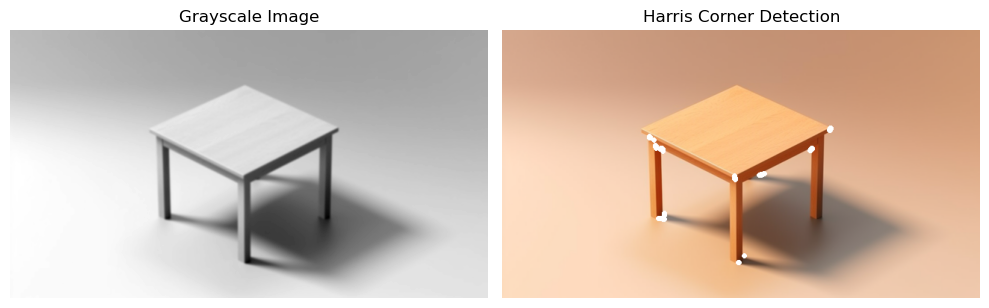

In [ ]:
image = cv2.imread(r"table.png") #Replace with your image path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = cv2.GaussianBlur(gray, (5,5), 0)

dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.05)

dst = cv2.dilate(dst, None)

threshold = 0.02 * dst.max()
corner_points = np.where(dst > threshold)

for y, x in zip(*corner_points):
    cv2.circle(image, (x, y), 2, (255, 255, 255), -1)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis("off")

plt.tight_layout()
plt.show()

<h2>Object Segmentation</h2>

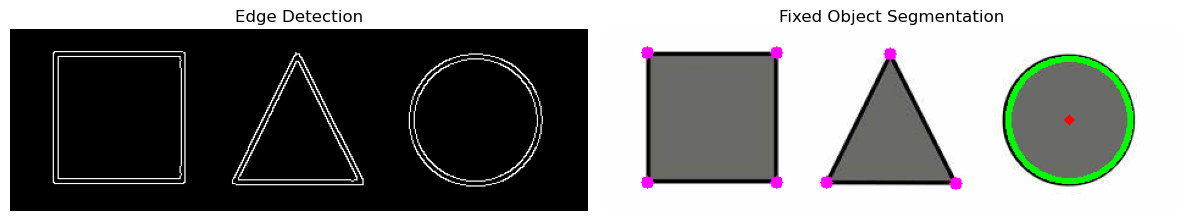

In [ ]:
image = cv2.imread(r"ob.jpg") #Replace with your image path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5,5), 0)

edges = cv2.Canny(blurred, 50, 150)

circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50, param1=50, param2=40, minRadius=10, maxRadius=100)

output = image.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 3)
        cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)

corners = cv2.goodFeaturesToTrack(gray, maxCorners=7, qualityLevel=0.01, minDistance=10)
corners = corners.astype(int)


for i in corners:
    x, y = i.ravel()
    cv2.circle(output, (x, y), 5, (255, 0, 255), -1) 

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Fixed Object Segmentation")
plt.axis("off")

plt.tight_layout()
plt.show()

<h1>Images 2</h1>

In [96]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

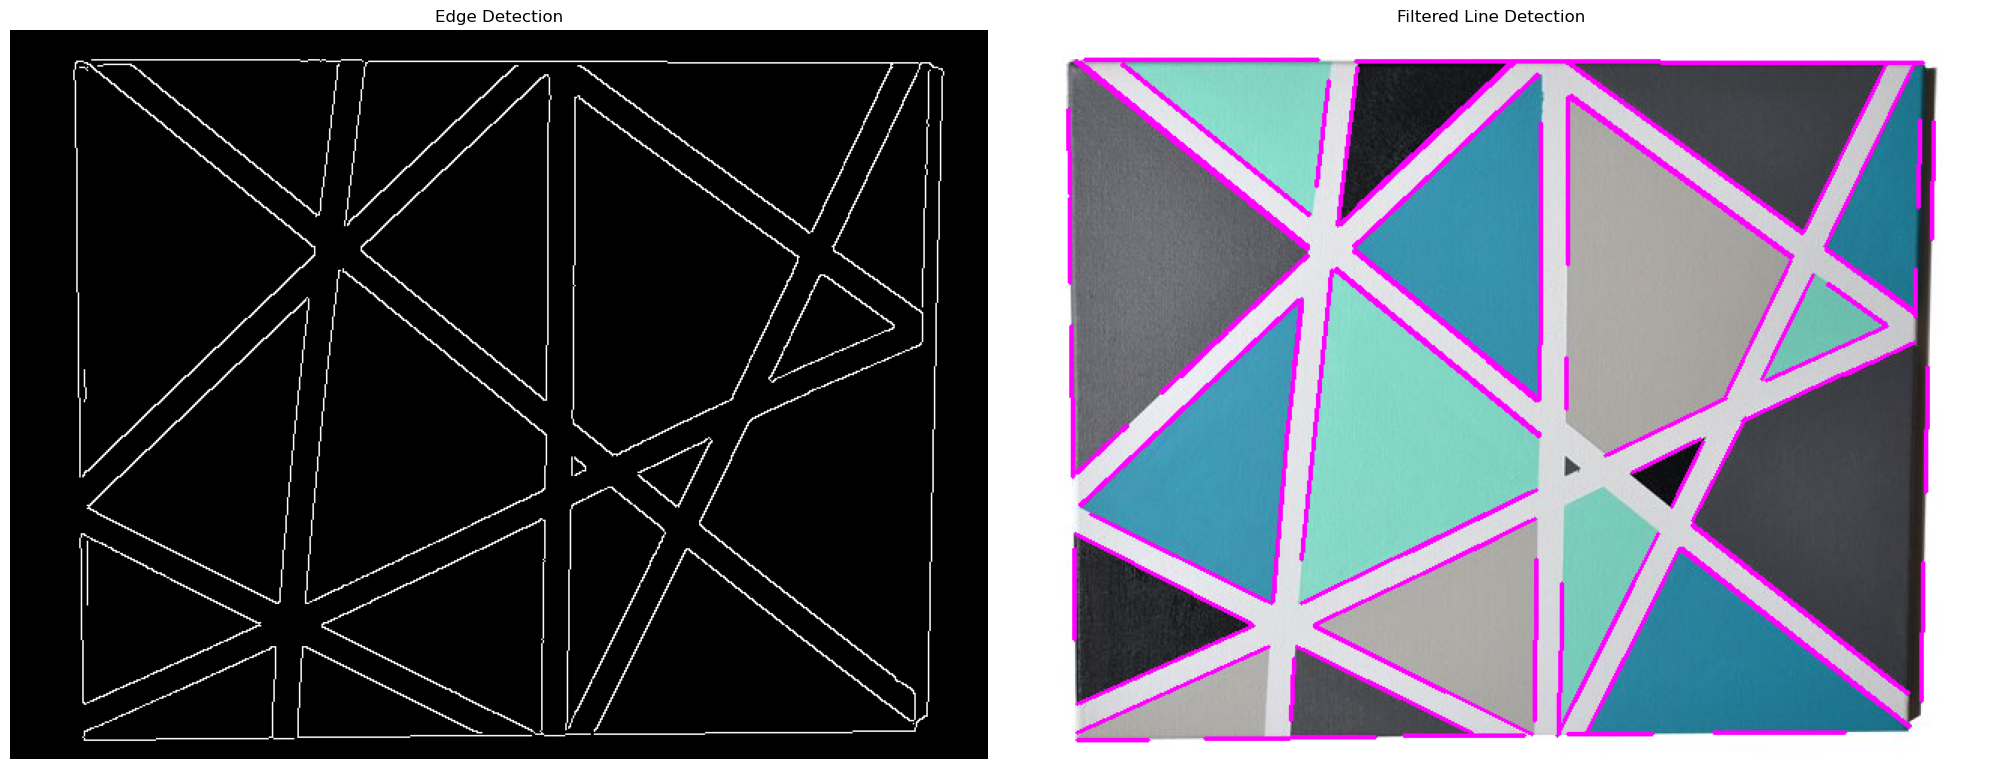

In [ ]:
og = cv2.imread(r"img.jpg") #Replace with your image path
gray = cv2.cvtColor(og, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5,5), 0)

edges = cv2.Canny(blurred, 50, 100)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50,minLineLength=30,maxLineGap=5)  

output = og.copy()

if lines is not None:
    for line in lines:
        x1,y1,x2,y2 = line[0]
        cv2.line(output, (x1, y1), (x2, y2), (255, 0, 255), 2)

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Filtered Line Detection")
plt.axis("off")

plt.tight_layout()
plt.show()

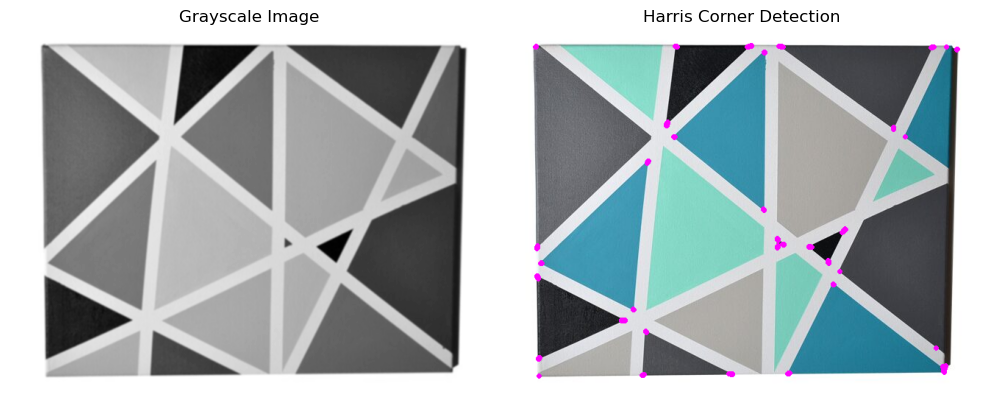

In [ ]:
image = cv2.imread(r"img.jpg") #Replace with your image path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = cv2.GaussianBlur(gray, (5,5), 0)

dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.05)

dst = cv2.dilate(dst, None)

threshold = 0.02 * dst.max()
corner_points = np.where(dst > threshold)

for y, x in zip(*corner_points):
    cv2.circle(image, (x, y), 2, (255, 0, 255), -1)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis("off")

plt.tight_layout()
plt.show()